In [ ]:
import torch
from torch import nn
import torchvision
from torchvision import transforms 
from torch.utils import data
from d2l import torch as d2l

: 

# 定义模型

In [2]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,(5,5))
        self.conv2 = nn.Conv2d(6,16,(5,5))
        self.conv3 = nn.Conv2d(16,120,(5,5))
        self.avgPooling = nn.AvgPool2d((2,2),stride=2)
        self.lin1 = nn.Linear(120,84)
        self.lin2 = nn.Linear(84,10)
        self.actFun = nn.Tanh()
        self.flatten = nn.Flatten()
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.actFun(x)
        x = self.avgPooling(x)

        x = self.conv2(x)
        x = self.actFun(x)
        x = self.avgPooling(x)
        
        x = self.conv3(x)
        x = self.actFun(x)
        x = self.flatten(x)
        
        x = self.lin1(x)
        x = self.actFun(x)
        x = self.lin2(x)
        return x

## 测试模型

In [4]:
net = Net()
x = torch.rand(size=(1,1,32,32),dtype=torch.float32)
net(x).shape

torch.Size([1, 10])

## 加载数据

In [5]:
def load_data_mnist(batch_size, resize=None):
  """下载MNIST数据集，然后将其加载到内存中"""
  trans = [transforms.ToTensor()]
  # MNIST手写数字识别的图片大小不一定是 32*32
  # 在这里可以把图片缩放到符合我们模型的输入大小
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  # 下载到当前目录下的data目录即可
  mnist_train = torchvision.datasets.MNIST(
    root="./data", train=True, transform=trans, download=True)
  mnist_test = torchvision.datasets.MNIST(
    root="./data", train=False, transform=trans, download=True)
  return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                        num_workers=2),
        data.DataLoader(mnist_test, batch_size, shuffle=False,
                        num_workers=2))

In [6]:
batch_size = 128

In [7]:
train_iter, test_iter = load_data_mnist(batch_size, resize=32)

## 观察数据
我们打印一下我们加载好的数据

In [8]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
#         if titles:
        ax.set_title(titles[i])
    return axes

In [9]:
def get_mnist_labels(y):
    return [y[i].item() for i in range(len(y))]

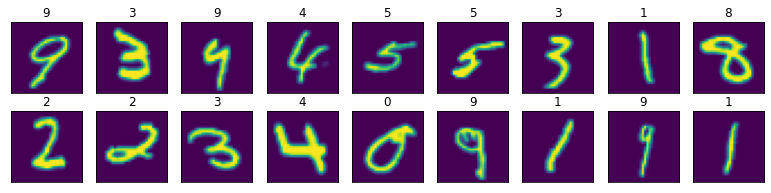

In [10]:
X, y = next(iter(train_iter))
show_images(X[:18].reshape(18,32,32), 2, 9, titles=get_mnist_labels(y[:18]));

## 训练模型

In [13]:
lr, num_epochs = 0.05,10

loss 0.303, train acc 0.914, test acc 0.919
29401.8 examples/sec on cuda:0


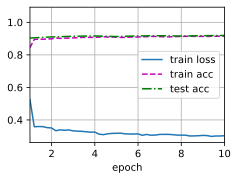

In [14]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())